<a href="https://colab.research.google.com/github/vladimirwest/HSE_ML_Course/blob/master/KNN_1_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1
## Dataset: covertype (https://archive.ics.uci.edu/ml/datasets/Covertype)

Задача заключается в прогнозировании типа лесного покрова (cover tree). Фактический (ground truth) тип лесного покрова для каждого наблюдения (ячейка 30 х 30 м) был определен на основе данных Информационной системы ресурсов (RIS) Районной службы США по лесам (USFS).
Объект исследований представляет собой четыре области дикой природы, расположенные в Национальном лесу Рузвельта на севере Колорадо. 


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
!gzip -d covtype.data.gz
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
#data = pd.read_csv(url, sep=', ', header=None,  engine='python')
colnames = ["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4","Soil_Type1","Soil_Type2","Soil_Type3","Soil_Type4","Soil_Type5","Soil_Type6","Soil_Type7","Soil_Type8","Soil_Type9","Soil_Type10","Soil_Type11","Soil_Type12","Soil_Type13","Soil_Type14","Soil_Type15","Soil_Type16","Soil_Type17","Soil_Type18","Soil_Type19","Soil_Type20","Soil_Type21","Soil_Type22","Soil_Type23","Soil_Type24","Soil_Type25","Soil_Type26","Soil_Type27","Soil_Type28","Soil_Type29","Soil_Type30","Soil_Type31","Soil_Type32","Soil_Type33","Soil_Type34","Soil_Type35","Soil_Type36","Soil_Type37","Soil_Type38","Soil_Type39","Soil_Type40","Cover_Type"]
data = pd.read_csv('./covtype.data', sep = ',', header=None, engine = 'python', names = colnames)

--2019-12-22 20:14:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11240707 (11M) [application/x-httpd-php]
Saving to: ‘covtype.data.gz’

covtype.data.gz     100%[===================>]  10.72M  7.35MB/s    in 1.5s    

2019-12-22 20:14:32 (7.35 MB/s) - ‘covtype.data.gz’ saved [11240707/11240707]

gzip: covtype.data already exists; do you wish to overwrite (y or n)? y


In [0]:

data.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The forest cover type is the classification problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Name / Data Type / Measurement / Description

Elevation / quantitative /meters / Elevation in meters  
Aspect / quantitative / azimuth / Aspect in degrees azimuth  
Slope / quantitative / degrees / Slope in degrees  
Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features  
Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features  
Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway  
Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice  
Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice  
Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice  
Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points  
Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation  
Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation  
Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

In [0]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [0]:
#Проверим на NA's
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


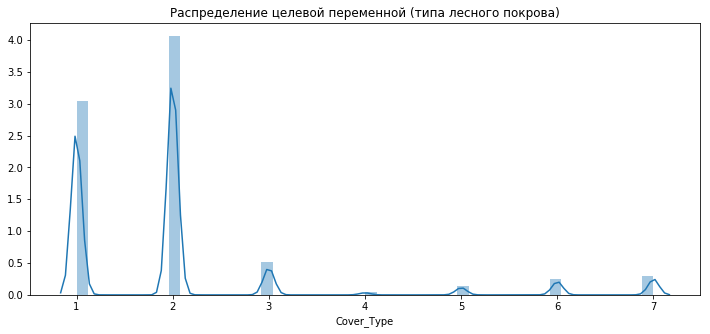

In [0]:
import seaborn as sns
plt.figure(figsize=(12,5))
plt.title("Распределение целевой переменной (типа лесного покрова)")
ax = sns.distplot(data["Cover_Type"])

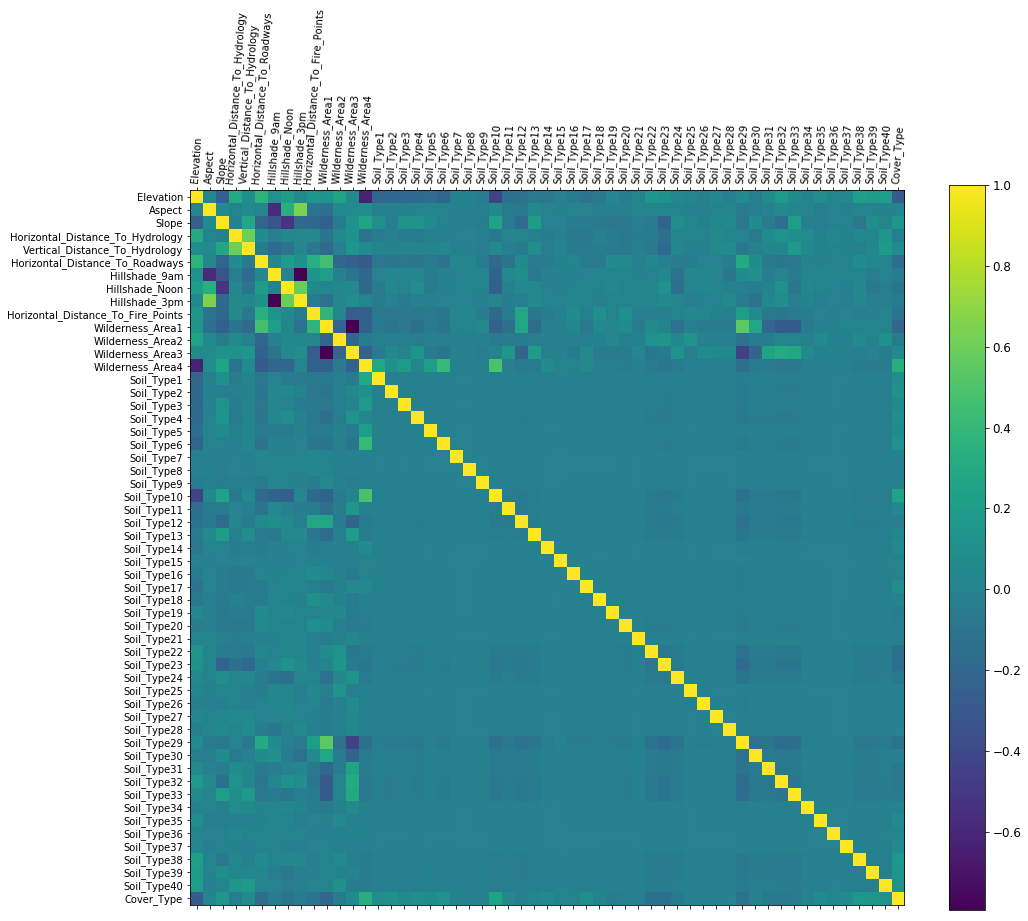

In [0]:
f = plt.figure(figsize=(16, 13))
corr = data.corr()
plt.matshow(corr, fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=10, rotation=86)
plt.yticks(range(data.shape[1]), data.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)

In [0]:
corr.Cover_Type.map(lambda x : x).abs().sort_values(ascending = True)

Soil_Type26                           0.000375
Soil_Type7                            0.000496
Soil_Type28                           0.001702
Soil_Type8                            0.003667
Soil_Type34                           0.004643
Soil_Type9                            0.006110
Soil_Type15                           0.006425
Soil_Type25                           0.006449
Soil_Type18                           0.007390
Soil_Type16                           0.009844
Soil_Type30                           0.010436
Soil_Type27                           0.014407
Aspect                                0.017080
Horizontal_Distance_To_Hydrology      0.020317
Soil_Type12                           0.023601
Soil_Type13                           0.024404
Soil_Type36                           0.025397
Soil_Type21                           0.025400
Soil_Type20                           0.028665
Soil_Type11                           0.035379
Hillshade_9am                         0.035415
Soil_Type19  

Из результатов выше видно, что несколько признаков Soil_Type не имеют какой-либо корреляции с целевой переменной Cover_Type, поэтому мы можем попробовать удалить их из имеющихся у нас данных. С другой стороны, когда есть слабая корреляция, признак в сочетании с другим признаком может оказать большее влияние на результат.

### Data split + normalization

In [0]:
#Select predictors
X = data[data.columns[:54]]
#Target variable 
y = data.Cover_Type

from sklearn.model_selection import train_test_split

#Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state =  92)
print(X_train.shape, X_test.shape)

(406708, 54) (174304, 54)


In [0]:
from sklearn import preprocessing

#По описанию первые 10 признаков являются численными, поэтому они нуждаются в нормализации 
train_norm = X_train[X_train.columns[0:10]]
test_norm = X_test[X_test.columns[0:10]]

std_scale = preprocessing.StandardScaler().fit(train_norm)
X_train_norm = std_scale.transform(train_norm)

training_norm_col = pd.DataFrame(X_train_norm, index=train_norm.index, columns=train_norm.columns) 
X_train.update(training_norm_col)
print (X_train.head())

# Нормализуем тестовые данные используя mean и stdev тренировочных данных
X_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(X_test_norm, index=test_norm.index, columns=test_norm.columns) 
X_test.update(testing_norm_col)
print (X_test.head())

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


        Elevation    Aspect     Slope  ...  Soil_Type38  Soil_Type39  Soil_Type40
308633  -1.994377  1.708702 -0.814930  ...            0            0            0
271042  -0.524826  1.655111  0.387379  ...            0            0            0
168722   0.608624 -0.827956 -1.082109  ...            0            0            0
245837  -0.127940 -1.086981  0.387379  ...            0            0            0
571149  -1.443743  0.440373  0.120199  ...            0            0            0

[5 rows x 54 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


        Elevation    Aspect     Slope  ...  Soil_Type38  Soil_Type39  Soil_Type40
443669   0.444149  0.833377  0.654558  ...            0            0            0
121896  -1.304296 -1.212027 -1.215699  ...            0            0            0
271268  -3.102798  1.405018  1.322507  ...            0            0            0
477178   0.633653  1.360358 -0.814930  ...            0            0            0
401094   0.365486 -0.970866 -0.681340  ...            0            0            0

[5 rows x 54 columns]


In [0]:
X_train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,4.067080e+05,4.067080e+05,4.067080e+05,4.067080e+05,4.067080e+05,4.067080e+05,4.067080e+05,4.067080e+05,4.067080e+05,4.067080e+05,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000
mean,-6.673224e-16,2.088486e-17,2.882435e-17,-1.393219e-15,-1.888398e-16,1.130281e-16,-1.578889e-16,-1.308835e-15,-2.578211e-16,7.799252e-18,0.449615,0.051292,0.435858,0.063235,0.005183,0.012791,0.008237,0.021418,0.002695,0.011219,0.000157,0.000305,0.001967,0.056230,0.021448,0.051799,0.030098,0.001065,0.000005,0.004890,0.005876,0.003334,0.006808,0.015800,0.001438,0.057624,0.099892,0.036692,0.000831,0.004406,0.001898,0.001576,0.198265,0.052030,0.044140,0.090011,0.077289,0.002825,0.003393,0.000209,0.000467,0.026813,0.023752,0.015124
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.497455,0.220594,0.495869,0.243385,0.071807,0.112370,0.090383,0.144774,0.051842,0.105326,0.012543,0.017458,0.044307,0.230365,0.144872,0.221621,0.170857,0.032612,0.002218,0.069761,0.076433,0.057645,0.082231,0.124701,0.037899,0.233031,0.299857,0.188005,0.028816,0.066232,0.043527,0.039668,0.398693,0.222088,0.205406,0.286197,0.267050,0.053077,0.058151,0.014455,0.021609,0.161536,0.152275,0.122046
min,-3.935902e+00,-1.390665e+00,-1.883648e+00,-1.266987e+00,-3.642193e+00,-1.508164e+00,-7.925712e+00,-1.130290e+01,-3.728893e+00,-1.495818e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.391280e-01,-8.726152e-01,-6.813400e-01,-7.597212e-01,-6.767780e-01,-7.991350e-01,-5.272127e-01,-5.230132e-01,-6.169824e-01,-7.231092e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.295001e-01,-2.563145e-01,-1.469807e-01,-2.430617e-01,-2.825321e-01,-2.272957e-01,2.201104e-01,1.349141e-01,1.062981e-02,-2.047002e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [0]:
%%time
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,8)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

CPU times: user 33min 43s, sys: 449 ms, total: 33min 44s
Wall time: 33min 45s


Text(0, 0.5, 'Accuracy')

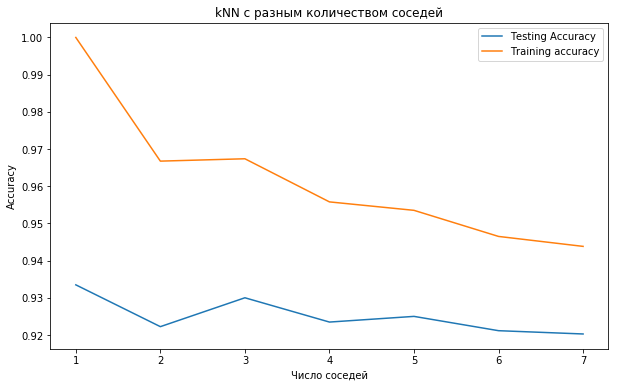

In [0]:
#Generate plot
plt.figure(figsize=(10,6))
plt.title('kNN с разным количеством соседей')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Число соседей')
plt.ylabel('Accuracy')
#plt.show()

In [0]:
for i,k in enumerate(neighbors):
  print(train_accuracy[i] - test_accuracy[i])

0.06648728657976866
0.04448866598387924
0.03736072738845886
0.03229892537875101
0.02850341451614824
0.025334871502949552
0.023543247426990543


Возьмем k=5 за основу, т.к. похоже, что это хороший вариант так как по ошибке rain_acc - test_acc, так и по accuracy в целом.

In [0]:
five_nn = KNeighborsClassifier(n_neighbors=5)
five_nn.fit(X_train,y_train)
Accuracy=five_nn.score(X_test,y_test)
print('5NN Accuracy:',Accuracy)

5NN Accuracy: 0.9250332751973563


## Feature selection baseline solution

Чтобы уменьшить размерность данных, можно применить feature_selection на основе деревьев.
Видим, что кол-во признаков сократилось до 12, что может ускорить процесс обучения модели не особо повлияв на результат.

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
New_features = model.transform(X)
model.get_support()
New_features.shape

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(581012, 12)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
Classifiers = [DecisionTreeClassifier(),LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),RandomForestClassifier(n_estimators=200)]
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(pd.DataFrame(New_features), y , test_size = 0.3, random_state =  92)

In [0]:
%%time
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_sel, y_train_sel)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_sel, y_train_sel)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_sel, y_test_sel) 

CPU times: user 3min 6s, sys: 20.6 ms, total: 3min 6s
Wall time: 3min 6s


Text(0, 0.5, 'Accuracy')

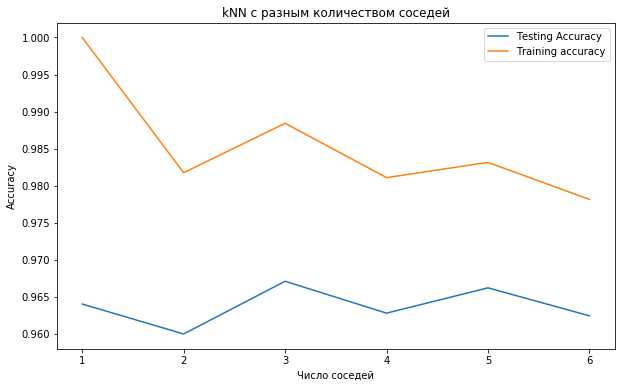

In [0]:
#Generate plot
plt.figure(figsize=(10,6))
plt.title('kNN с разным количеством соседей')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Число соседей')
plt.ylabel('Accuracy')
#plt.show()

In [0]:
five_nn = KNeighborsClassifier(n_neighbors=5)
five_nn.fit(X_train_sel,y_train_sel)
Accuracy_sel=five_nn.score(X_test_sel,y_test_sel)
print('5NN Accuracy:',Accuracy_sel)
print(Accuracy_sel-Accuracy)

5NN Accuracy: 0.9662084633743345
0.04376835872957596


Получили результаты лучше (5NN better for 4,3%), попробуем другие классификаторы:

In [0]:
from sklearn.metrics import accuracy_score
Model = []
Accuracy = []
for clf in Classifiers:
    fit=clf.fit(X_train_sel,y_train_sel)
    pred=fit.predict(X_test_sel)
    Model.append(clf.__class__.__name__)
    Accuracy.append(accuracy_score(y_test_sel,pred))
    print('Accuracy of '+clf.__class__.__name__ +' is '+str(accuracy_score(y_test_sel,pred)))

Accuracy of DecisionTreeClassifier is 0.9148097576647696


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of LogisticRegression is 0.5196266293372499
Accuracy of RandomForestClassifier is 0.9453254084817331


Тут улучшить не удалось, однако мы можнм посмотреть на важность фич благодаря использованию деревьев.

In [0]:
importances = clf.feature_importances_

In [0]:
X[X.columns[model.get_support(indices=True)]].columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area4',
       'Soil_Type22'],
      dtype='object')

Посмотрим на важность выбранных признаков для классификатора RandomForestClassifier:  
Видим, что наибольшую значимость всё-таки оказывает высота покрова, что вполне объяснимо, а уже далее идет дистанция до дорог/водоемов/пожаров.

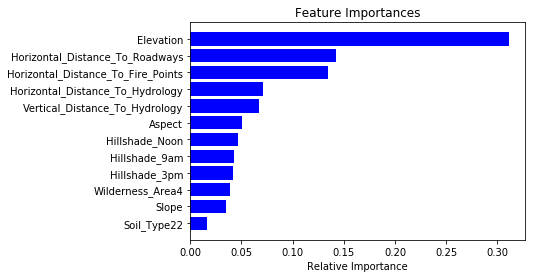

In [0]:
features = X[X.columns[model.get_support(indices=True)]].columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Можно отметить, что мы не выполняли stratification при разделении датасета на train и test, при этом результат в 0.925 multiclass Accuracy является очень хорошим.
После выбора признаков мы смогли улучшить baseline на 4,3%, что на мой взгляд является очень хорошим результатом.


Могу отметить про kNN следующее:  
1) Следует применять как baseline  
2) Хорошо проявляет себя в тех случаях, когда количество примеров (rows) в датасете велико.  
3) Подвержен curse of dimensionality, поэтому при работе с данными высокой размерности (большим кол-вом признаков) следует быть осторожным.
4) Большая временная сложность с данными высокой размерности и большим количеством соседей.  
5) Имеет смысл поработать и выбрать значимые признаки, это может как улучшить результаты, так и существенно сократить время обучения.  

## PCA

In [0]:
from sklearn.decomposition import PCA
#PCA with two principal components
pca_2d = PCA(n_components=2)

In [0]:
X = data[data.columns[:54]]
PCs_2d = pca_2d.fit_transform(X.sample(5000))

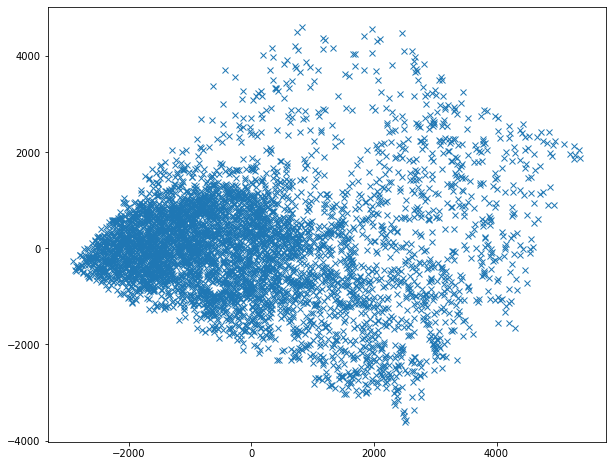

In [0]:
plt.figure(figsize=(10,8))
plt.plot(PCs_2d[:,0], PCs_2d[:,1], 'x')
plt.show()

Попробуем с нормализацией:

In [0]:
from sklearn import preprocessing
#Select predictors
X = data[data.columns[:54]]
#Target variable 
y = data.Cover_Type

#По описанию первые 10 признаков являются численными, поэтому они нуждаются в нормализации 
X_norm = X[X.columns[0:10]]

std_scale = preprocessing.StandardScaler().fit(X_norm)
X_norm_scaled = std_scale.transform(X_norm)

norm_col = pd.DataFrame(X_norm_scaled, index=X_norm.index, columns=X_norm.columns) 
X.update(norm_col)
print (X.head())

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:5819: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



   Elevation    Aspect     Slope  ...  Soil_Type38  Soil_Type39  Soil_Type40
0  -1.297805 -0.935157 -1.482820  ...            0            0            0
1  -1.319235 -0.890480 -1.616363  ...            0            0            0
2  -0.554907 -0.148836 -0.681563  ...            0            0            0
3  -0.622768 -0.005869  0.520322  ...            0            0            0
4  -1.301377 -0.988770 -1.616363  ...            0            0            0

[5 rows x 54 columns]


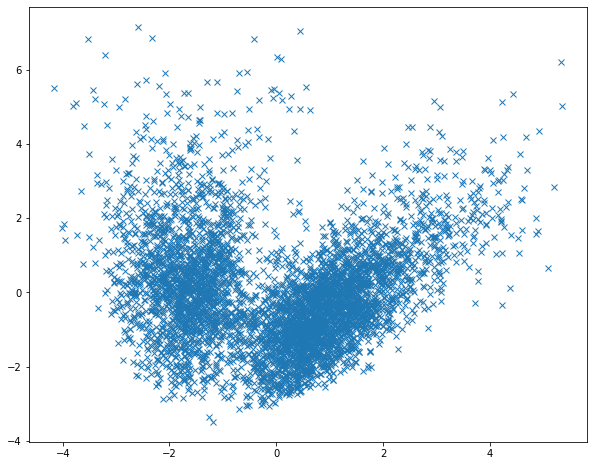

In [0]:
pca_2d_norm_sample = PCA(n_components=2)
PCs_2d_norm_sample = pca_2d.fit_transform(X.sample(5000))
plt.figure(figsize=(10,8))
plt.plot(PCs_2d_norm_sample[:,0], PCs_2d_norm_sample[:,1], 'x')
plt.show()

Здесь четко видим два "кластера"

In [0]:
pca_2d_norm = PCA(n_components=2)
PCs_2d_norm = pca_2d.fit_transform(X)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(PCs_2d_norm, y , test_size = 0.3, random_state =  42)

five_nn = KNeighborsClassifier(n_neighbors=5)
five_nn.fit(X_train,y_train)
Accuracy=five_nn.score(X_test,y_test)
print('5NN Accuracy:', Accuracy)

5NN Accuracy: 0.47950133100789427


Видим, что accuracy сильно упала в сравнении с 5-nn без PCA.

Попробуем посмотреть на влияние кол-ва компонент на accuracy.

In [0]:
from sklearn.metrics import accuracy_score
error_metric = []
for n in range(10,0,-1):
    pca = PCA(n_components=n, random_state=27)
    PCs = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(PCs, y, test_size = 0.3, random_state = 42)

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    err = accuracy_score(y_test, pred)
    print(str(err) + ' with n=' + str(n))
    error_metric.append(err)

0.9130656783550578 with n=10
0.9129566733982009 with n=9
0.9027733155865614 with n=8
0.8902721681659629 with n=7
0.8892681751422802 with n=6
0.8107788691022582 with n=5
0.6587341655957408 with n=4
0.5344513034697999 with n=3
0.47950133100789427 with n=2
0.4321300715990454 with n=1


Видим, что с изменением числа компонент от 1 до 6 сильно меняется значение accuracy. Дальше уже практически не изменяется.

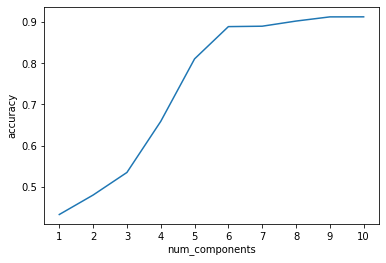

In [0]:
error_metric.reverse()
plt.plot(error_metric)
plt.ylabel('accuracy')
plt.xlabel('num_components')
plt.xticks(np.arange(len(error_metric)), np.arange(1, len(error_metric)+1))
plt.show()

Здесь лучшим вариантом в плане точности и сложности будут 6 главных компонент. Этот результат примерно сравним с тем, что мы получали при обычном 5-nn.
Посмотрим, что будет без нормализации:

In [0]:
X = data[data.columns[:54]]
PCs_2d = pca_2d.fit_transform(X)

from sklearn.metrics import accuracy_score
error_metric = []
for n in range(10,0,-1):
    pca = PCA(n_components=n, random_state=27)
    PCs = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(PCs, y, test_size = 0.3, random_state = 42)

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    err = accuracy_score(y_test, pred)
    print(str(err) + ' with n=' + str(n))
    error_metric.append(err)

0.9656347530750872 with n=10
0.9656634385900495 with n=9
0.96557164494217 with n=8
0.9649061409950431 with n=7
0.9626399853130163 with n=6
0.958038828713053 with n=5
0.9280796768863595 with n=4
0.7743081053791078 with n=3
0.4942801083165045 with n=2
0.45916330089957774 with n=1


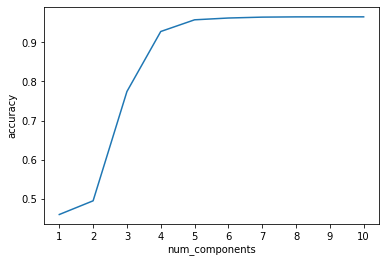

In [0]:
error_metric.reverse()
plt.plot(error_metric)
plt.ylabel('accuracy')
plt.xlabel('num_components')
plt.xticks(np.arange(len(error_metric)), np.arange(1, len(error_metric)+1))
plt.show()

Тут получились отличные результаты, сравнимые с самым лучшим классификатором с учетом feature_selection. Самым оптимальным выбором будет n = 5-6 главных компонент (по acc/time complexity).  
Кроме этого сделаем вывод, что нормализация перед PCA в данном случае ухудшила результаты.

## NeuralNet classifier

In [0]:
#Select predictors
X = data[data.columns[:54]]
#Target variable 
y = data.Cover_Type

from sklearn.model_selection import train_test_split

#Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state =  92)
print(X_train.shape, X_test.shape)

(406708, 54) (174304, 54)


In [0]:
from sklearn import preprocessing

#По описанию первые 10 признаков являются численными, поэтому они нуждаются в нормализации 
train_norm = X_train[X_train.columns[0:10]]
test_norm = X_test[X_test.columns[0:10]]

std_scale = preprocessing.StandardScaler().fit(train_norm)
X_train_norm = std_scale.transform(train_norm)

training_norm_col = pd.DataFrame(X_train_norm, index=train_norm.index, columns=train_norm.columns) 
X_train.update(training_norm_col)
print (X_train.head())

# Нормализуем тестовые данные используя mean и stdev тренировочных данных
X_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(X_test_norm, index=test_norm.index, columns=test_norm.columns) 
X_test.update(testing_norm_col)
print (X_test.head())

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:5819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


        Elevation    Aspect     Slope  ...  Soil_Type38  Soil_Type39  Soil_Type40
308633  -1.994377  1.708702 -0.814930  ...            0            0            0
271042  -0.524826  1.655111  0.387379  ...            0            0            0
168722   0.608624 -0.827956 -1.082109  ...            0            0            0
245837  -0.127940 -1.086981  0.387379  ...            0            0            0
571149  -1.443743  0.440373  0.120199  ...            0            0            0

[5 rows x 54 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:5819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


        Elevation    Aspect     Slope  ...  Soil_Type38  Soil_Type39  Soil_Type40
443669   0.444149  0.833377  0.654558  ...            0            0            0
121896  -1.304296 -1.212027 -1.215699  ...            0            0            0
271268  -3.102798  1.405018  1.322507  ...            0            0            0
477178   0.633653  1.360358 -0.814930  ...            0            0            0
401094   0.365486 -0.970866 -0.681340  ...            0            0            0

[5 rows x 54 columns]


In [0]:
%%time
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

CPU times: user 10min 30s, sys: 2min 12s, total: 12min 42s
Wall time: 7min 57s


Видим, что  для нашего (относительно большого) датасета MLPClassifier обучается довольно долго.


In [0]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [0]:
print("train error:",np.mean(y_train != y_train_pred))
print("test error:",np.mean(y_test != y_test_pred))

train error: 0.22129390127560805
test error: 0.22264549293188912


In [0]:
print("train accuracy: ", mlp_model.score(X_train, y_train))
print("test accuracy: ", mlp_model.score(X_test, y_test))

train accuracy:  0.7787060987243919
test accuracy:  0.7773545070681109


### Normalized confusion matrix

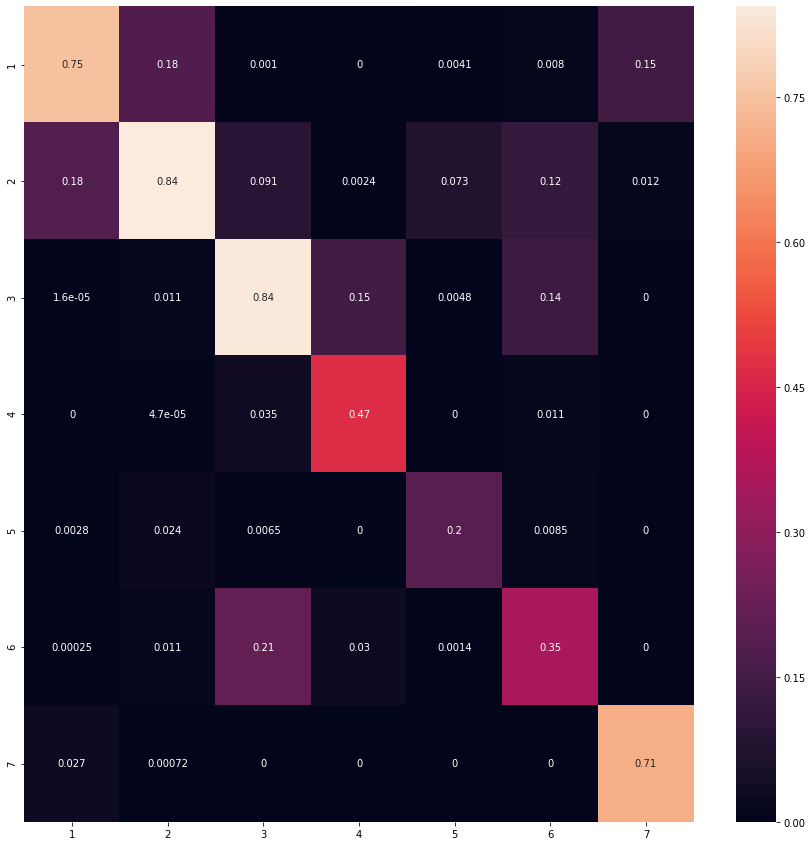

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
classes = [1,2,3,4,5,6,7]
cnf_matrix = confusion_matrix(y_test, y_test_pred, labels = classes)
plt.figure(figsize=(15,15))
ax = sns.heatmap(cnf_matrix / cnf_matrix.astype(np.float).sum(axis=1), annot=True,xticklabels=classes,yticklabels=classes)

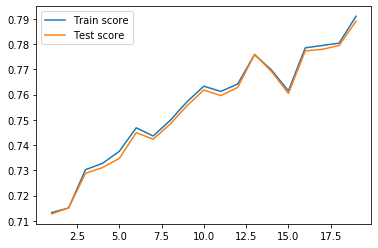

In [0]:
from sklearn.neural_network import MLPClassifier
test_scores = []
train_scores =[]
for i in range(1, 20):
    mlp_model = MLPClassifier(alpha = 0, hidden_layer_sizes = (i,), solver = 'lbfgs', 
                              activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)
    train_scores.append(mlp_model.score(X_train, y_train))
    test_scores.append(mlp_model.score(X_test, y_test))
plt.plot(range(1, 20), train_scores, label = 'Train score')
plt.plot(range(1, 20), test_scores, label = 'Test score')
plt.legend()

Видим, что в зависимости от кол-ва скрытых слоев, ошибка варьируется в пределах 10%. Чем больше слоев, тем ниже ошибка.  
При этом первоначальное использование 100 скрытых слоев дало нам результат в 0.77 acc, а 20 слоев в 0.79.  
Вместе с этим можно отметить, что test result достаточно хорошо сходится к train.  
Далее посмотрим на параметр Alpha, будем использовать hidden_layer_size = 20, следуя из результатов подбора.

CPU times: user 1h 5min, sys: 17min 34s, total: 1h 22min 34s
Wall time: 49min 1s


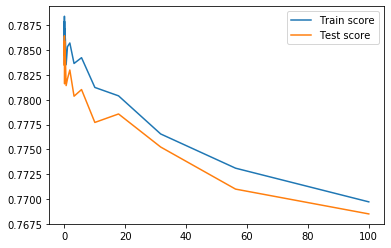

In [0]:
%%time
from sklearn.neural_network import MLPClassifier
import numpy as np
alpha_arr = np.logspace(-3, 2, 21)
test_scores = []
train_scores =[]
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (20,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)
    train_scores.append(mlp_model.score(X_train, y_train))
    test_scores.append(mlp_model.score(X_test, y_test))
plt.plot(np.logspace(-3, 2, 21), train_scores, label = 'Train score')
plt.plot(np.logspace(-3, 2, 21), test_scores, label = 'Test score')
plt.legend()

Подбор параметров занимает большое время из-за размера датасета.  


In [0]:
alpha_arr[0]

0.001

Наилучшими параматрами из тех, которые мы перебрали, являются:  
alpha = 0.001  
hidden_layer_sizes = 20
Запустим модель на них, посмотрим conf_matrix и сравним с лучшим классификатором из прошлых.

In [0]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (20,), solver = 'lbfgs', 
                          activation = 'logistic', alpha = 0.001, random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
print("train accuracy: ", mlp_model.score(X_train, y_train))
print("test accuracy: ", mlp_model.score(X_test, y_test))

train accuracy:  0.7871519616039026
test accuracy:  0.7848184780613181


In [0]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

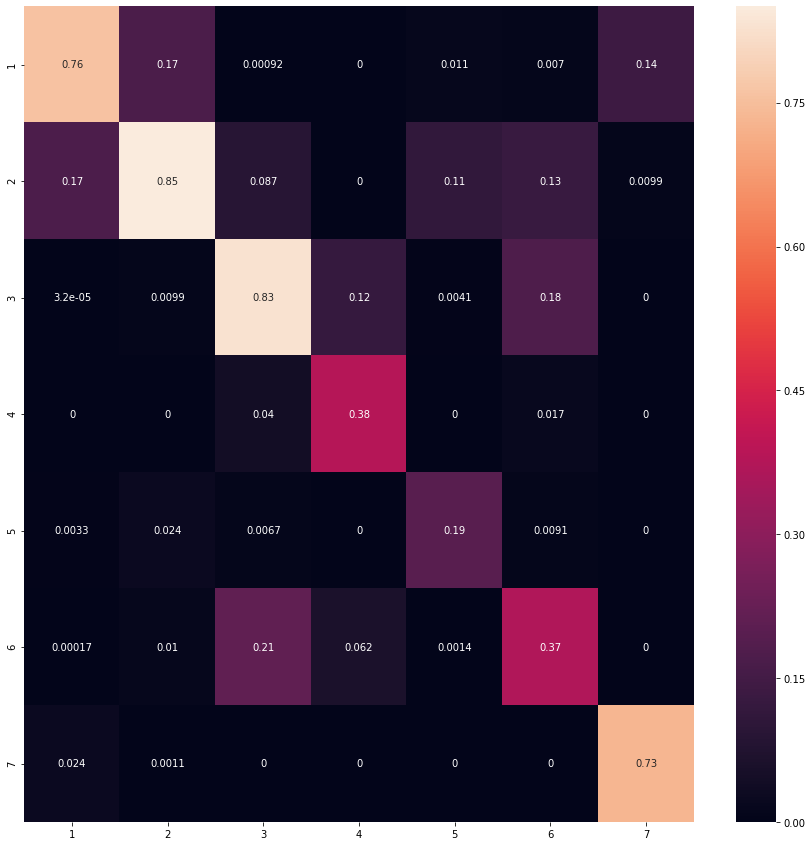

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
classes = [1,2,3,4,5,6,7]
cnf_matrix = confusion_matrix(y_test, y_test_pred, labels = classes)
plt.figure(figsize=(15,15))
ax = sns.heatmap(cnf_matrix / cnf_matrix.astype(np.float).sum(axis=1), annot=True,xticklabels=classes,yticklabels=classes)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
five_nn = KNeighborsClassifier(n_neighbors=5)
five_nn.fit(X_train,y_train)
Accuracy_sel=five_nn.score(X_test,y_test)
print('5NN Accuracy:',Accuracy_sel)

5NN Accuracy: 0.9250332751973563


NameError: ignored

In [0]:
y_test_pred_knn = five_nn.predict(X_test)

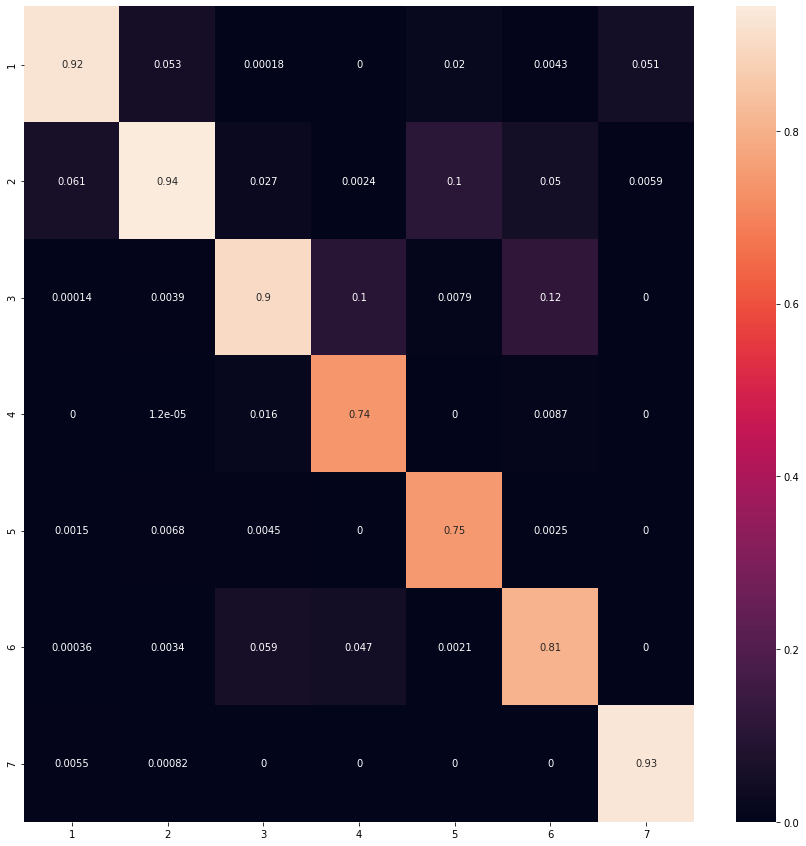

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
classes = [1,2,3,4,5,6,7]
cnf_matrix = confusion_matrix(y_test, y_test_pred_knn, labels = classes)
plt.figure(figsize=(15,15))
ax = sns.heatmap(cnf_matrix / cnf_matrix.astype(np.float).sum(axis=1), annot=True,xticklabels=classes,yticklabels=classes)

Видим, что 5knn по всем классам дает результат лучше, чем MLP, а работает быстрее.
Попробуем сделать PCA и применим MLPClassifier:

### PCA + MLPClassifier

Так как процесс обучения MLPClassifier занимает большое кол-во времени, то попробуем сделать PCA с кол-вом компонент 2,4,6,10.
Для MLPClassifier возьмем лучшие найденные параметры.

In [13]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X = data[data.columns[:54]]
y = data.Cover_Type

from sklearn.metrics import accuracy_score
error_metric = []
for n in [2,4,6,10]:
    pca = PCA(n_components=n, random_state=27)
    PCs = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(PCs, y, test_size = 0.3, random_state = 92)

    model = MLPClassifier(hidden_layer_sizes = (20,), solver = 'lbfgs', activation = 'logistic', alpha = 0.001, random_state = 42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    err = accuracy_score(y_test, pred)
    print(str(err) + ' with n=' + str(n))
    error_metric.append(err)

0.4937293464292271 with n=2
0.6671734440976684 with n=4
0.6751422801542133 with n=6
0.6754520837158069 with n=10
CPU times: user 10min 12s, sys: 3min 57s, total: 14min 9s
Wall time: 8min 43s


In [0]:
y_test_pred_MLP_PCA = model.predict(X_test)

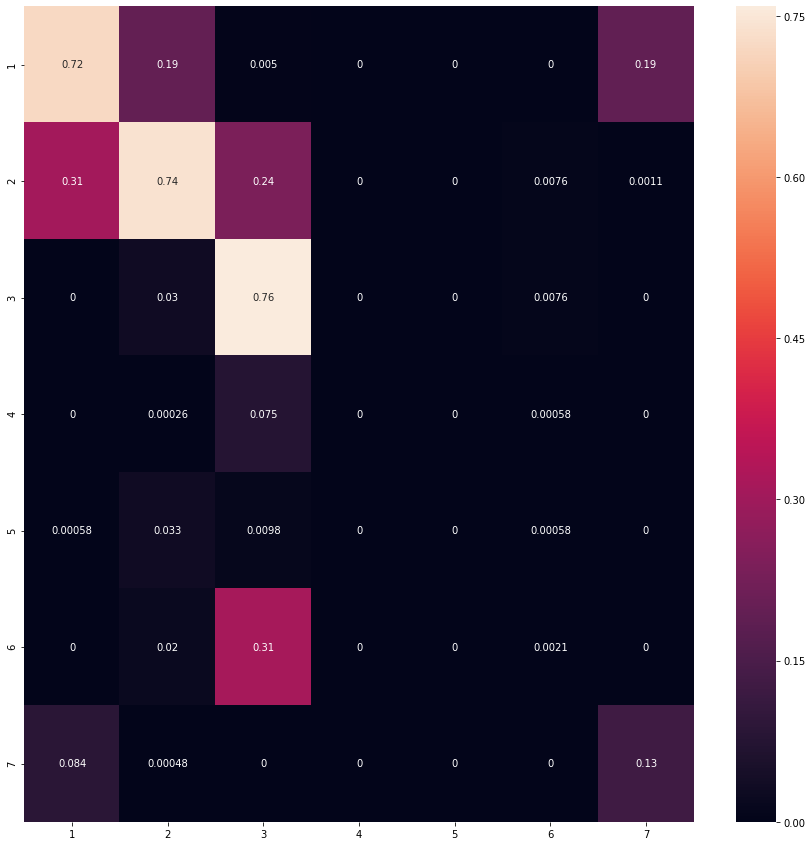

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
classes = [1,2,3,4,5,6,7]
cnf_matrix = confusion_matrix(y_test, y_test_pred_MLP_PCA, labels = classes)
plt.figure(figsize=(15,15))
ax = sns.heatmap(cnf_matrix / cnf_matrix.astype(np.float).sum(axis=1), annot=True,xticklabels=classes,yticklabels=classes)

Видим, что модель обучается хорошо только 1-3 классам.  
Попробуем несколько слоев:

In [17]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X = data[data.columns[:54]]
y = data.Cover_Type

from sklearn.metrics import accuracy_score
error_metric = []
for n in [2,6,10]:
    for n_layers in [2,3]:
        pca = PCA(n_components=n, random_state=27)
        PCs = pca.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(PCs, y, test_size = 0.3, random_state = 92)

        model = MLPClassifier(hidden_layer_sizes = (20,n_layers), solver = 'lbfgs', activation = 'logistic', alpha = 0.001, random_state = 42)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        err = accuracy_score(y_test, pred)
        print(str(err) + ',' + str(n_layers) + ' with n=' + str(n))
        error_metric.append(err)

0.494492381127226,2 with n=2
0.4941137323297228,3 with n=2
0.6775117036901046,2 with n=6
0.6761462731778961,3 with n=6
0.6848724068294474,2 with n=10
0.6827439416192399,3 with n=10
CPU times: user 17min 10s, sys: 7min 38s, total: 24min 48s
Wall time: 14min 38s


Всё-таки попробуем нормализовать, потому что результаты получаются хуже, чем на нормализованном датасете.

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#Select predictors
X = data[data.columns[:54]]
#Target variable 
y = data.Cover_Type

#По описанию первые 10 признаков являются численными, поэтому они нуждаются в нормализации 
X_norm = X[X.columns[0:10]]

std_scale = preprocessing.StandardScaler().fit(X_norm)
X_norm_scaled = std_scale.transform(X_norm)

norm_col = pd.DataFrame(X_norm_scaled, index=X_norm.index, columns=X_norm.columns) 
X.update(norm_col)
print (X.head())

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:5819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


   Elevation    Aspect     Slope  ...  Soil_Type38  Soil_Type39  Soil_Type40
0  -1.297805 -0.935157 -1.482820  ...            0            0            0
1  -1.319235 -0.890480 -1.616363  ...            0            0            0
2  -0.554907 -0.148836 -0.681563  ...            0            0            0
3  -0.622768 -0.005869  0.520322  ...            0            0            0
4  -1.301377 -0.988770 -1.616363  ...            0            0            0

[5 rows x 54 columns]


In [0]:
pca_2d = PCA(n_components=6)
PCs_2d_norm = pca_2d.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(PCs_2d_norm, y , test_size = 0.3, random_state =  92)

In [11]:
from sklearn.metrics import accuracy_score

error_metric = []
for n_layers in [1,2,3]:
    model = MLPClassifier(hidden_layer_sizes = (20,n_layers), solver = 'lbfgs', activation = 'logistic', alpha = 0.001, random_state = 42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    err = accuracy_score(y_test, pred)
    print(str(err) + ',' + str(n_layers))
    error_metric.append(err)

0.6992897466495318,1
0.7018255461722048,2
0.7070520469983477,3


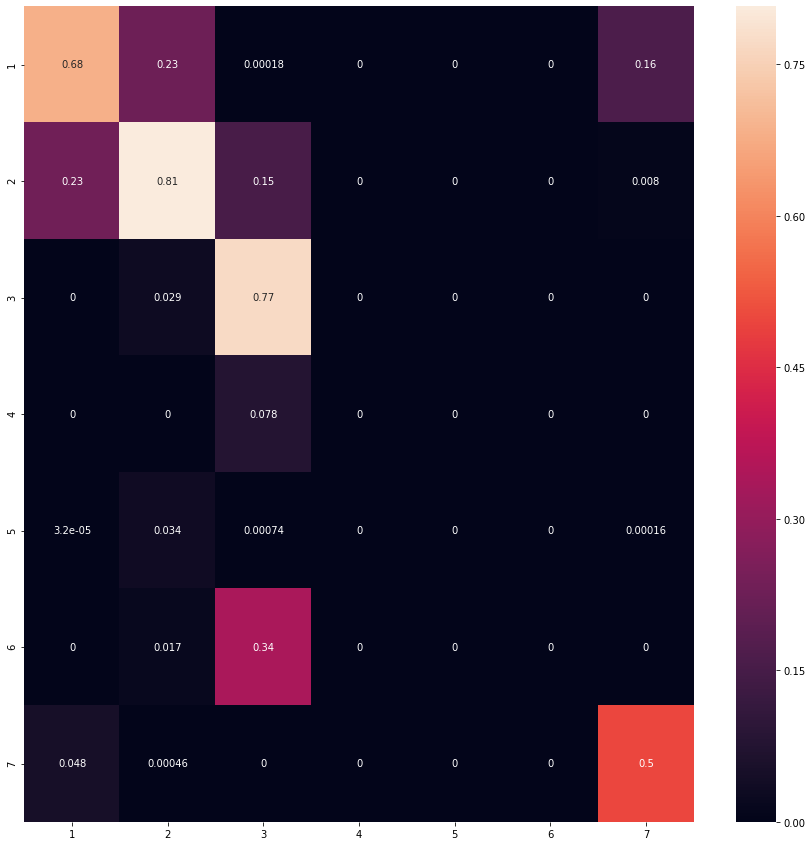

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
classes = [1,2,3,4,5,6,7]
cnf_matrix = confusion_matrix(y_test, pred, labels = classes)
plt.figure(figsize=(15,15))
ax = sns.heatmap(cnf_matrix / cnf_matrix.astype(np.float).sum(axis=1), annot=True,xticklabels=classes,yticklabels=classes)

Видим. что модель обучились 1-3 и 7 классу, с остальными же классами всё крайне плохо.  
С использованием MLPClassifier PCA не помог.  
Несколько мыслей на данный счет:  
1)MLPClassifier может работать хуже RandomForest из-за  несбалансированных классами и большого размера выборки.
2)Нейросетевые методы для данной ML задачи сработали не так хорошо. (depends on dataset)  
3)MLPClassifier на большом объеме данных (выборка + признаки) работает довольно долго. 